## LogAnalyzerApp
Scott Schmidt; Python Automation; Illinois State University

This automation program uses regex to srap through over one hundred thousands log files to find IP address, status, action, and date. After storing data into a dataframe, we can run queries to find important information such as most common IP address with a status code of 200.

#### Log File Example: 
80.110.186.51 - - [21/Dec/2015:17:20:12 +0100] "GET /images/stories/raith/oststeiermark.png HTTP/1.1" 200 65225 "http://www.almhuette-raith.at/" "Mozilla/5.0 (iPad; CPU OS 9_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Version/9.0 Mobile/13B143 Safari/601.1" "-"

In [1]:
import pandas as pd
import re
import time

class LogAnalyzerApp:
    def __init__(self, files):
        self.file = files
        
    def analyzeFile(self):
        #STORE INTO LISTS TO CREATE DATAFRAME LATER:
        dayList=[]
        monthList=[]
        yearList=[]
        ipList=[]
        actionList=[]
        statusList=[]
        count=0
        
        for f in files:
            f = open(f, "r")
            content = f.read()
            content_list = content.splitlines()
            for c in content_list:      
                date=re.search(r'(?<=\[).+?(?=\:)',c)[0]
                dates=date.split('/')
                num=int(dates[0])
                month=dates[1]
                year=int(dates[2])
                if month=='Feb' and num>17 and year==2016 or month=='Mar' and num==1 and year==2016:
                    #print(num, month, year)
                    count=count+1

                ip = re.match(r'[0-9]+(?:\.[0-9]+){3}', c )[0]
                action='GET'
                status='200'
                if 'POST' in c:
                    action='POST'
                if '404' in c:
                    status='404'
                
                dayList.append(num)
                monthList.append(month)
                yearList.append(year)
                ipList.append(ip)
                actionList.append(action)
                statusList.append(status)
                
            f.close()
            print("File closing.")
        print("Done. Total files found: ", count)

        df = pd.DataFrame(list(zip(dayList, monthList, yearList, 
                                   ipList, actionList, statusList)),
                          columns=['Day', 'Month', 'Year', 'IP', 'Action', 'Status'])
        return df
    
    def topIP(self, df):
        """
        returns most IP in dataframe

        :param df: dataframe data
        :param p2: describe about parameter p2
        :return: most common IP
        """ 
        return df['IP'].value_counts
        
if __name__ == "__main__":
    print("running")
    
    file1='/kaggle/input/access-log/access_1.log'
    file2='/kaggle/input/access-log/access_2.log'
    file3='/kaggle/input/access-log/access_3.log'
    files=[file1, file2, file3]
    
    log=LogAnalyzerApp(files)
    df=log.analyzeFile()

running
File closing.
File closing.
File closing.
Done. Total files found:  106999


### View Data 

In [2]:
    df.head()

,Day,Month,Year,IP,Action,Status
0,21,Dec,2015,80.110.186.51,GET,200
1,21,Dec,2015,80.110.186.51,GET,200
2,21,Dec,2015,80.110.186.51,GET,200
3,21,Dec,2015,80.110.186.51,GET,200
4,21,Dec,2015,80.110.186.51,GET,200


### Most Common IP address
Count is a paramter that will return how many most common IP addresses.
In this case, it will return ten, since count is 10.

<AxesSubplot:>

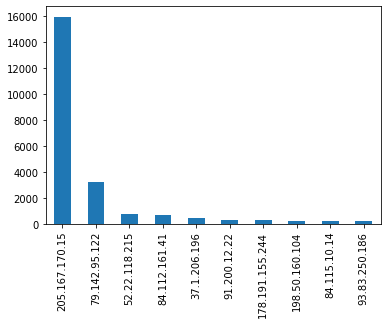

In [3]:
    df['IP'].value_counts().head(10).plot(kind='bar')

### Top5 client IPs with status code 404

<AxesSubplot:>

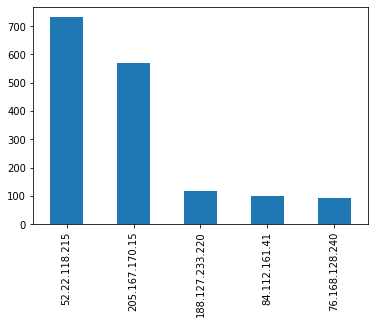

In [4]:
    df404=df.loc[(df['Status']=='404')]
    df404['IP'].value_counts().head().plot(kind='bar')

### Top5 client IPs with HTTP action POST and status code 200

<AxesSubplot:>

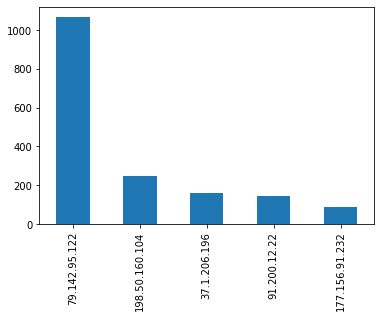

In [5]:
    dfPOST=df.loc[(df['Status']=='200') & (df['Action']=="POST")]
    dfPOST['IP'].value_counts().head().plot(kind='bar')

## Log Analyzer Application Full Instructions
Use OOP to develop a Log Analyzer Application (LogAnalyzerApp) to analyze web access logs. The log.zip file includes all log files (i.e., access_1.log, access_2.log, access_3.log).  The larger N of a file name, the newer the file is.

In this mini project, you need do the following:
1. Define and implement a LogAnalyzer class, which can: Read all log files under a given folder such as “log”. We assume the naming convention of a log file is access_N.log. We assume there could be any number of log files under this folder. So don’t hard code “3” as a limit.
2. Search for client IP, timestamp, HTTP actions (e.g., GET, POST, HEAD), HTTP status codes.  
3. Response to the following queries with formatted output:
* TopN client IPs (N can be specified by a user, say 3, 5, 10) among all monitored time period or a specific time window (e.g., between 18/Feb/2016 and 01/Mar/2016)
* TopN HTTP actions (N can be specified by a user, say 1, 2, 3) among all monitored time period or a specific time window (e.g., between 18/Feb/2016 and 01/Mar/2016)
* TopN client IPs (N can be specified by a user, say 3, 5, 10) with status code (e.g., 200 or 404) among all monitored time period or a specific time window (e.g., between 18/Feb/2016 and 01/Mar/2016)
* TopN client IPs (N can be specified by a user, say 3, 5, 10) with a specific action (e.g., GET, or POST) and status code (200 or 404) among all monitored time period or a specific time window (e.g., between 18/Feb/2016 and 01/Mar/2016)
(You are free to define necessary methods/fields and use any number of parameters for the methods as needed)

Develop a Python application called LogAnalyzer.py. In LogAnalyzerApp, you create an instance of LogAnalyzer and parse the log files under a given folder (e.g., log). Test your program with the following queries. Print a report (and take a screenshot) for all these queries:
* Top10 client IPs between 18/Feb/2016 and 01/Mar/2016)
* Top3 HTTP actions between 18/Feb/2016 and 01/Mar/2016)
* Top5 client IPs with status code 404 between 18/Feb/2016 and 01/Mar/2016)
* Top5 client IPs with HTTP action POST and status code 200 between 18/Feb/2016 and 01/Mar/2016)

Your Deliverables:
* A single Python program called LogAnalyzer.py (including the class LogAnalyzer)
* One word document called test.doc including the screenshot of the printed report. 

Grading Policy:
1.	10 points for LogAnalyzer class design: appropriate selection of fields and methods.
2.	45 points for correct implementation of the class LogAnalyzer.
3.	12 points for correct implementation of LogAnalyzerApp.
4.	3 points for the screenshot.